In [1]:
import keras
from keras.models import Model
from keras.layers import Dense,Input
from keras.datasets import mnist
from keras import backend as K

import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train , _),(X_test , _) =mnist.load_data()

X_train=X_train.reshape(-1,784).astype('float32')/255.0
X_test=X_train.reshape(-1,784).astype('float32')/255.0



In [4]:
def show_image(pixels):
    img=pixels.reshape(28,28)
    
    plt.axis('off')
    plt.imshow(img,cmap='gray_r')
    

In [11]:
input_layer=Input(shape=(784,))

hidden1=Dense(300,activation='relu')(input_layer)
hidden2=Dense(144,activation='relu')(hidden1)

hidden3=Dense(300,activation='relu')(hidden2)
decoder=Dense(784,activation='relu')(hidden3)

encoder=K.function([input_layer],[hidden2])

model =Model(input_layer,decoder)
model.compile(optimizer=keras.optimizers.Adadelta(),loss='binary_crossentropy')


In [12]:
model.fit(X_train,X_train,epochs=12,batch_size=256,validation_data=(X_test,X_test))

Train on 60000 samples, validate on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 55s 923us/step - loss: 0.4230 - val_loss: 0.0078
Epoch 2/12
60000/60000 [==============================] - 55s 917us/step - loss: 0.3048 - val_loss: 0.0079
Epoch 3/12
60000/60000 [==============================] - 54s 894us/step - loss: 0.2682 - val_loss: 0.0080
Epoch 4/12
60000/60000 [==============================] - 55s 919us/step - loss: 0.2516 - val_loss: 0.0082
Epoch 5/12
60000/60000 [==============================] - 54s 892us/step - loss: 0.2423 - val_loss: 0.0084
Epoch 6/12
60000/60000 [==============================] - 53s 881us/step - loss: 0.2349 - val_loss: 0.0085
Epoch 7/12
60000/60000 [==============================] - 53s 888us/step - loss: 0.2142 - val_loss: 0.0085
Epoch 8/12
60000/60000 [==============================] - 54s 894us/step - loss: 0.1986 - val_loss: 0.0084
Epoch 9/12
60000/60000 [==============================] - 54s 897us/step - loss: 0.1927 - val_

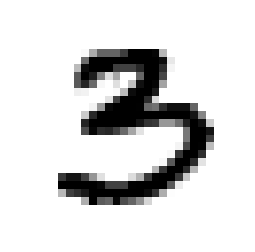

In [37]:
sample=random.choice(X_test)

show_image(sample)

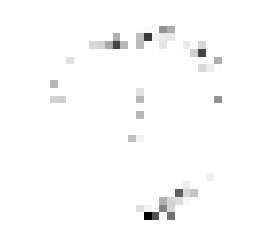

In [38]:
reconstructed=model.predict(sample.reshape(1,-1))

show_image(reconstructed)

In [40]:
values=encoder([sample.reshape(1,-1)])[0]
print values.shape / np.max(values).reshape(8,8)

plt.imshow(values,cmap='gray_r')

ValueError: cannot reshape array of size 1 into shape (8,8)